In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
inf = float('nan')

# [LaserScan ROS Message Definition](http://docs.ros.org/api/sensor_msgs/html/msg/LaserScan.html)

Single scan from a planar laser range-finder

If you have another ranging device with different behavior (e.g. a sonar array), please find or create a different message, since applications will make fairly laser-specific assumptions about this data

### `Header header`
timestamp in the header is the acquisition time of the first ray in the scan
in frame frame_id, angles are measured around the positive Z axis (counterclockwise, if Z is up) with zero angle being forward along the x axis
                         
### `float32 angle_min`
start angle of the scan [rad]
### `float32 angle_max`
end angle of the scan [rad]
### `float32 angle_increment`
angular distance between measurements [rad]

### `float32 time_increment`
time between measurements [seconds] - if your scanner is moving, this will be used in interpolating position of 3d points
### `float32 scan_time`
time between scans [seconds]

### `float32 range_min`
minimum range value [m]
### `float32 range_max`
maximum range value [m]

### `float32[] ranges`
range data [m] (Note: values < range_min or > range_max should be discarded)
### `float32[] intensities`
intensity data [device-specific units].  If your device does not provide intensities, please leave the array empty.


In [13]:
from sensor_msgs.msg import LaserScan

In [38]:
## Example RPLIDAR output
scan = LaserScan()
scan.header.frame_id = 'laser_link'
scan.angle_min = -3.12413907051
scan.angle_max = 3.14159274101
scan.angle_increment = 0.0174532923847
scan.time_increment = 3.4000848359e-07
scan.scan_time = 0.000122063043818
scan.range_min = 0.15000000596
scan.range_max = 6.0
scan.ranges = [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.8575000762939453, inf, inf, inf, 2.5647499561309814, inf, inf, 2.421250104904175, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.0537500381469727, 2.0532500743865967, 2.015500068664551, inf, 2.0027499198913574, 1.9667500257492065, 1.9322500228881836, 1.9197499752044678, inf, 1.9084999561309814, 1.875749945640564, 1.8767499923706055, 1.846500039100647, 1.8454999923706055, inf, 1.8312499523162842, 1.8250000476837158, 1.8147499561309814, 1.8012499809265137, inf, 1.7972500324249268, 1.7972500324249268, 1.78725004196167, 1.783750057220459, inf, 1.784000039100647, 1.780750036239624, 1.784000039100647, 1.781749963760376, inf, 1.7822500467300415, 1.783750057220459, 1.7834999561309814, 1.7999999523162842, inf, 1.778499960899353, 1.8022500276565552, 1.8055000305175781, inf, inf, inf, inf, inf, 1.8522499799728394, inf, inf, inf, 1.8545000553131104, inf, inf, inf, 1.912750005722046, 1.9112499952316284, 1.966249942779541, inf, 1.9667500257492065, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0.257750004529953, 0.25999999046325684, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.23799991607666, 1.1762499809265137, inf, inf, inf, inf, 1.8209999799728394, 0.6000000238418579, 7.556000232696533, inf, inf, inf, inf, inf, 1.7137500047683716, 0.596750020980835, 0.3095000088214874, inf, inf, inf, inf, inf, inf, 5.3142499923706055, inf, 1.9329999685287476, 0.4494999945163727, 0.26124998927116394, inf, 0.20475000143051147, inf, inf, inf, inf, inf, inf, inf, 4.02400016784668, inf, 3.970249891281128, 3.878999948501587, 3.872499942779541, 3.8227500915527344, inf, 3.779750108718872, 3.7360000610351562, 3.726249933242798, 3.683500051498413, inf, 3.5985000133514404, 3.467250108718872, 3.461750030517578, 3.422499895095825, 3.4110000133514404, inf, 3.372999906539917, 3.3375000953674316, 3.3067500591278076, 3.3052499294281006, inf, 3.227250099182129, 3.2209999561309814, 3.2190001010894775, 3.208750009536743, inf, 3.2047500610351562, 3.2012500762939453, 3.150749921798706, 1.8485000133514404, 0.5764999985694885, 0.3634999990463257, 0.20424999296665192, 0.18449999392032623, 0.16725000739097595, 0.15324999392032623, 0.12325000017881393, inf, 0.13199999928474426, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.228749990463257, inf, 3.281749963760376, 3.3112499713897705, 3.3984999656677246, 3.407749891281128, inf, 3.6882500648498535, 3.4237499237060547, 3.4590001106262207, 3.530750036239624, inf, 3.601749897003174, 3.6112499237060547, 3.7304999828338623, 3.7715001106262207, inf, 3.7855000495910645, 3.8627500534057617, 3.877500057220459, 3.96875, inf, 4.013500213623047, 4.024750232696533, 4.071750164031982, inf, inf, 4.190999984741211, 0.8309999704360962, 0.35624998807907104, 0.3019999861717224, 0.18125000596046448, 0.1665000021457672, 0.15150000154972076, 0.14124999940395355, 0.12300000339746475, inf, inf, inf, 0.1197500005364418, inf, inf, inf, inf, inf, inf, inf]
scan.intensities = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 9.0, 0.0, 10.0, 11.0, 11.0, 11.0, 0.0, 14.0, 13.0, 15.0, 16.0, 16.0, 0.0, 18.0, 21.0, 22.0, 26.0, 0.0, 28.0, 31.0, 30.0, 32.0, 0.0, 28.0, 28.0, 30.0, 28.0, 0.0, 28.0, 25.0, 25.0, 23.0, 0.0, 41.0, 20.0, 19.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 14.0, 14.0, 11.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 0.0, 9.0, 9.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 10.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 0.0, 10.0, 11.0, 12.0, 0.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 13.0, 13.0, 13.0, 13.0, 0.0, 14.0, 13.0, 16.0, 16.0, 0.0, 17.0, 15.0, 17.0, 18.0, 18.0, 0.0, 17.0, 16.0, 17.0, 16.0, 0.0, 16.0, 17.0, 17.0, 18.0, 0.0, 17.0, 17.0, 17.0, 11.0, 12.0, 11.0, 12.0, 12.0, 11.0, 11.0, 10.0, 0.0, 13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 0.0, 15.0, 15.0, 16.0, 15.0, 0.0, 14.0, 16.0, 16.0, 13.0, 0.0, 16.0, 16.0, 16.0, 15.0, 0.0, 14.0, 14.0, 15.0, 14.0, 0.0, 13.0, 13.0, 13.0, 0.0, 0.0, 13.0, 12.0, 11.0, 11.0, 10.0, 11.0, 11.0, 12.0, 10.0, 0.0, 0.0, 0.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [12]:
print round((angle_max - angle_min + angle_increment)/angle_increment)

360.0


In [42]:
# generate an array with the scan angles associated with sequential points in a laser scan
def generate_scan_angles(angle_min, angle_max, angle_increment, yaw_offset=0):
    n_points = int(round((angle_max - angle_min + angle_increment)/angle_increment))
    angles = []
    for i in xrange(n_points):
        angle = wrap_angle(angle_min + i*angle_increment + yaw_offset)
        angles.append(angle)
    return angles

# wrap angle to interval [-pi, pi]
def wrap_angle(angle):
    while angle > math.pi:
        angle -= 2*math.pi
    while angle < math.pi:
        angle += 2*math.pi
    return angle
    

In [52]:
# plot a laser scan on a polar plot
def plot_scan_narrowed(scan, yaw_offset):
    
    angles = generate_scan_angles(scan.angle_min, scan.angle_max, scan.angle_increment)
    
    plt.figure(figsize=(10,5))
    ax = plt.subplot(121, polar=True)
    ax.plot(angles, scan.ranges, 'ob')
    ax.set_rmax(6)
    ax.grid(True)
    ax.set_title("LIDAR Scan", va='bottom')

    offset_angles = generate_scan_angles(scan.angle_min, scan.angle_max, scan.angle_increment, yaw_offset=yaw_offset)
    
    ax = plt.subplot(122, polar=True)
    ax.plot(offset_angles, scan.ranges, 'or')
    ax.set_rmax(6)
    ax.grid(True)

    ax.set_title("LIDAR Scan, Yaw Offset "+str(yaw_offset), va='bottom')
    plt.show()
    return plt

360
360


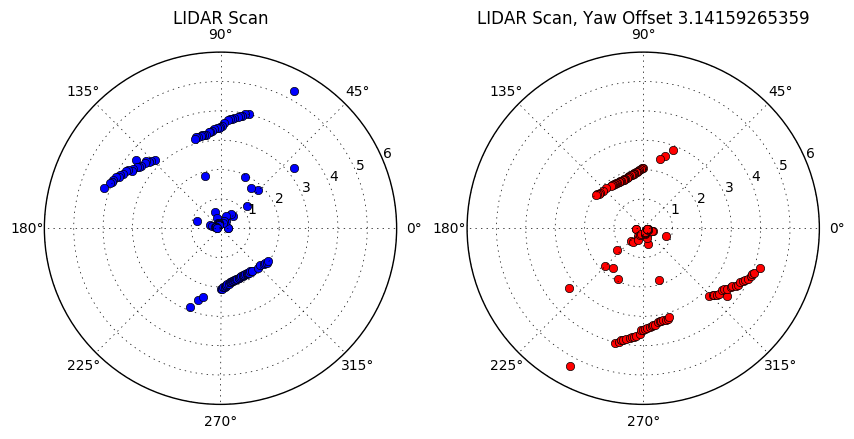

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [53]:
print len(angles)
print len(scan.intensities)
plot_scan_narrowed(scan, math.pi)